**Data collection**

I downloaded the data files from NOAA's Local Climatological Data (LCD) [site](https://www.ncei.noaa.gov/cdo-web/datatools/lcd) specifically focused on [West Lafayette](https://www.ncei.noaa.gov/cdo-web/datasets/LCD/stations/WBAN:14835/detail), Indiana. I downloaded the climate change indicator data from [Copernicus](https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset) [(CO2 Levels)](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-carbon-dioxide?tab=overview) [(Climate Indices)](https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-extreme-indices-cmip6?tab=overview) (GFDL-ESM4 (USA) Model and SSP3-7.0 for aerosol emissions) [(global temperature anomalies)](https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-postprocessed-single-levels?tab=overview). Need data on (NOx levels, other important aerosols, heat wave data, etc)

Naturally, it's important to read the [Dataset Documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/LCD_documentation.pdf) before working with the data and during the preprocessing stage to understand how to deal with different values. For further understanding, please read NOAA's [GSOM Summary](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GSOM_documentation.pdf)

# Objective & Plan

Project Plan: West Lafayette, Indiana Weather Prediction Using Machine Learning with Consideration of Climate Change

A coding project which uses machine learning and data from decades of weather patterns of each day to determine yearly climate patterns while incorporating climate change indicators.

#### Goals
1. **Primary Goal**: Develop a machine learning model to predict yearly climate patterns using historical weather data while accounting for climate change effects.
2. **Secondary Goal**: Enhance the model's accuracy and robustness with advanced techniques and external climate data.

#### Tasks and Completion Plan
3. **Feature Engineering**
   - **Task**: Extract and create relevant features from the dataset.
   - **How to Complete**: Create new features like moving averages, seasonal indicators.
   - **Potential Issues**: Determining the most relevant features and overfitting with too many features
5. **Model Training**
   - **Task**: Train the selected models on the preprocessed data.
   - **How to Complete**: Tune hyperparameters using grid search or randomized search.
   - **Potential Issues**: Overfitting or underfitting during training.

6. **Model Evaluation**
   - **Task**: Evaluate the performance of the trained models.
   - **How to Complete**:
     - Use metrics such as mean squared error (MSE), mean absolute error (MAE), and R-squared.
     - Compare model predictions with actual data.
   - **Potential Issues**:
     - Ensuring that evaluation metrics reflect the model's real-world performance.
     - Balancing between bias and variance.

7. **Incorporate Climate Change Factors**
   - **Task**: Integrate climate change data into the model to account for long-term trends.
   - **How to Complete**:
     - Obtain climate change data (e.g., CO2 levels, temperature anomalies).
     - Include these factors as features in the model.
   - **Potential Issues**:
     - Finding reliable and comprehensive climate change datasets.
     - Integrating these datasets with weather data effectively.

8. **Final Model Selection and Fine-Tuning**
   - **Task**: Select the best-performing model and fine-tune it.
   - **How to Complete**:
     - Analyze evaluation results to choose the best model.
     - Perform additional fine-tuning to optimize performance.
   - **Potential Issues**:
     - Overfitting during the fine-tuning process.
     - Ensuring model generalization to unseen data.

9. **Deployment**
   - **Task**: Deploy the final model for making real-time predictions.
   - **How to Complete**:
     - Create a web application or API to serve the model.
     - Use Flask/Django for web deployment, or FastAPI for creating APIs.
   - **Potential Issues**:
     - Ensuring scalability and performance of the deployed model.
     - Handling real-time data efficiently.

#### Potential Issues and Mitigations

- **Data Quality**: Ensure thorough data cleaning and preprocessing.
- **Model Overfitting/Underfitting**: Use cross-validation and regularization techniques.
- **Computational Resources**: Utilize cloud services (e.g., AWS, Google Cloud) for training and deployment.
- **Integration of Climate Data**: Careful feature engineering and validation.

#### Extra Features to Add

1. **Interactive Visualizations**
   - Create interactive dashboards to visualize weather predictions and climate trends using Plotly or Dash.

2. **Model Explanation**
   - Implement techniques like SHAP (SHapley Additive exPlanations) to explain model predictions and understand feature importance.

3. **Automated Data Pipeline**
   - Develop an automated data pipeline to continuously update the model with new data.

5. **Weather Alerts**
   - Integrate a notification system to alert users about significant weather changes or extreme weather events.

6. **User Interface**
   - Develop a user-friendly interface for non-technical users to interact with the model and view predictions.

# Combining & loading the data

In [ ]:
import os
import pandas as pd
import numpy as np

#pd.set_option('display.max_columns', None)

# Load the dataset
climate_data_original = pd.read_csv("/content/combined_weather_data.csv")
climate_data = climate_data_original.copy()

<ipython-input-1-6741d68bb1e4>:8: DtypeWarning: Columns (3,21,27,28,29,30,31,32,33,36,37,38,42,43,44,47,49,50,51,52,53,54,56,57,59,60,61,62,63,64,72,96,97,98,99,100,101,102,103,104,105,106,107,108,111,113,115,118,120) have mixed types. Specify dtype option on import or set low_memory=False.
  climate_data_original = pd.read_csv("/content/combined_weather_data.csv")


After I checked the data, I saw that most of the columns had a small amount of non-null values compared to the number of columns and found that the 'threshhold' was 'HourlySeaLevelPressure'. After that, every column had a small number of values compared to the number of rows

In [ ]:
# Get non-null counts for each column
non_null_counts = climate_data.notnull().sum()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Column': non_null_counts.index,
    'Non-Null Count': non_null_counts.values
})

# Sort the summary DataFrame by 'Non-Null Count' in descending order
sorted_summary_df = summary_df.sort_values(by='Non-Null Count', ascending=False)

''' # Remove these apostrophes to see the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
'''

# Display the sorted summary
print(sorted_summary_df)

                           Column  Non-Null Count
0                         STATION          354243
1                            DATE          354243
96                       SOURCE.1          354243
95                  REPORT_TYPE.1          354243
123       WindEquipmentChangeDate          354243
..                            ...             ...
74       MonthlyGreatestSnowDepth               0
75   MonthlyGreatestSnowDepthDate               0
76        MonthlyGreatestSnowfall               0
77    MonthlyGreatestSnowfallDate               0
5                 BackupDirection               0

[124 rows x 2 columns]


In [ ]:
# Calculate the number of non-null values in each column
non_null_counts = climate_data.notnull().sum()

# Find the threshold based on 'HourlySeaLevelPressure'
threshold = non_null_counts['HourlySeaLevelPressure']

# Filter columns to keep based on the threshold
columns_to_keep = non_null_counts[non_null_counts >= threshold].index

# Ensure columns_to_remove are only those present in the DataFrame
columns_to_remove = ['STATION', 'REPORT_TYPE', 'REPORT_TYPE.1', 'SOURCE', 'SOURCE.1', 'REM', 'WindEquipmentChangeDate']
columns_to_remove = [col for col in columns_to_remove if col in columns_to_keep]

climate_data = climate_data[columns_to_keep] # Create a new DataFrame with only the columns to keep
climate_data = climate_data.drop(columns=columns_to_remove) # Drop the columns specified for removal

In [ ]:
pd.set_option('display.max_columns', None)
climate_data.head()

,DATE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed
0,2019-01-01T00:54:00,29.93,37.0,38,97.0,29.94,29.25,5.00,38.0,270,8
1,2019-01-01T01:54:00,29.99,37.0,37,100.0,30.00,29.31,5.00,37.0,280,10
2,2019-01-01T02:54:00,30.03,37.0,37,100.0,30.03,29.35,10.00,37.0,280,6
3,2019-01-01T03:04:00,30.03,37.0,37,100.0,NaN,29.35,10.00,37.0,270,7
4,2019-01-01T03:15:00,30.05,37.0,37,100.0,NaN,29.36,10.00,37.0,270,6


# Preprocessing

There are some parts of the data where a character is given with or instead of the number value provided. These characters are:

1. "T" = trace precipitation amount or snow depth (an amount too small to measure, usually < 0.005 inches water equivalent) (appears instead of numeric value)
2. "s" = suspect value (appears with value)
3. "M" = missing value (appears instead of value)
4. Blank = value is unreported (nothing appears or "NaN")
5. "*" = Amounts included in following measurement; time distribution unknown
- for temps, these are used to indicate the extreme for the day and month, these can be deleted

Below shows how we dealt with them


In [ ]:
exclude_columns = ['DATE'] # Columns to exclude from filling missing values

# Define the function to clean the data
def clean_data(value):
    if value == 'T':
        return 0.0025  # A small value representing trace amount
    elif value == 's':
        return np.nan  # Suspect value can be treated as missing value
    elif value == 'M':
        return np.nan  # Missing value
    elif value == '*' or value == '':
        return np.nan  # Unreported value
    else:
        try:
            # Convert to float if possible
            return float(value)
        except ValueError:
            return np.nan  # If the value cannot be converted to float, treat it as missing

# Apply the cleaning function to the entire DataFrame except for the excluded columns
for col in climate_data.columns:
    if col not in exclude_columns:
        climate_data[col] = climate_data[col].apply(clean_data)

# Define a function to compute window mean
def compute_window_mean(df, col, idx, window_size):
    # Define the window
    start_idx = max(0, idx - window_size)
    end_idx = min(len(df), idx + window_size + 1)

    # Extract the window of values
    window_values = df[col].iloc[start_idx:end_idx]

    # Drop NaN values from the window and calculate mean
    non_nan_values = window_values.dropna()
    if len(non_nan_values) > 0:
        return non_nan_values.mean()
    return np.nan

# Define a function to fill missing values
def fill_missing_values(df, exclude_cols, window_size=10):
    # First pass: Fill missing values with mean of full windows
    df_filled = df.copy()
    for col in df.columns:
        if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col]):
            for idx in df[df[col].isna()].index:
                mean_value = compute_window_mean(df, col, idx, window_size)
                if not pd.isna(mean_value):
                    df_filled.at[idx, col] = mean_value

    # Second pass: Handle any remaining missing values
    for col in df.columns:
        if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col]):
            for idx in df_filled[df_filled[col].isna()].index:
                mean_value = compute_window_mean(df, col, idx, window_size)
                if pd.isna(mean_value):
                    # If we cannot calculate a mean, use the column's global mean
                    mean_value = df[col].mean()
                df_filled.at[idx, col] = mean_value

    return df_filled

# Apply the function
climate_data = fill_missing_values(climate_data, exclude_columns)

Imputing outliers

In [ ]:
def impute_outliers(data, strategy='median', threshold=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)

    if strategy == 'median':
        fill_value = np.median(data)
    elif strategy == 'mean':
        fill_value = np.mean(data)
    else:
        raise ValueError("Strategy must be 'median' or 'mean'")

    data = np.where((data < lower_bound) | (data > upper_bound), fill_value, data)
    return data

imputed_data = impute_outliers(climate_data['HourlyWetBulbTemperature'])

In [ ]:
# Convert 'DATE' column to datetime
climate_data['DATE'] = pd.to_datetime(climate_data['DATE'], format='ISO8601')

# Set 'DATE' column as index
climate_data.set_index('DATE', inplace=True)

# Sort the DataFrame by the datetime index
climate_data.sort_index(inplace=True)

In [ ]:
climate_data.to_csv('updated_climate_data.csv', index=True)

In [ ]:
climate_data.head()

,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed
DATE,,,,,,,,,,
1999-01-01 00:00:00,30.095000,38.357143,50.142857,67.357143,30.087857,29.297778,9.642857,66.888889,199.285714,7.500000
1999-01-01 00:54:00,30.270000,0.000000,3.000000,85.000000,30.270000,29.302500,10.000000,66.250000,0.000000,0.000000
1999-01-01 01:00:00,30.138462,30.923077,41.230769,70.692308,30.133846,29.308571,9.461538,65.428571,164.615385,6.384615
1999-01-01 01:54:00,30.280000,-2.000000,1.000000,85.000000,30.280000,29.316667,10.000000,64.666667,250.000000,3.000000
1999-01-01 02:00:00,30.191667,22.583333,30.750000,74.916667,30.188333,29.330000,9.250000,63.800000,126.666667,4.666667


Direct influence on temperature

1. **HourlyDryBulbTemperature** - Directly measures the current air temperature, essential for predicting future temperatures.
2. **HourlyDewPointTemperature** - Indicates moisture in the air, which affects temperature and weather conditions.
3. **HourlyRelativeHumidity** - Affects the perception of temperature and can influence how temperature changes.
4. **HourlyWetBulbTemperature** - Provides a measure of humidity’s effect on temperature, which is useful in predicting temperature changes.

Indirectly influences temperature
5. **HourlySeaLevelPressure** - Affects weather patterns and can indirectly influence temperature.
6. **HourlyStationPressure** - Related to sea level pressure and affects weather conditions that can influence temperature.
7. **HourlyVisibility** - Primarily related to atmospheric conditions rather than temperature directly.
8. **HourlyAltimeterSetting** - Measures atmospheric pressure but is less directly related to temperature prediction.
9. **HourlyPrecipitation** - Affects weather conditions but is less directly related to temperature prediction compared to other factors.

Not sure

10. **HourlyWindSpeed** - Influences temperature by affecting heat transfer and can impact how temperature changes.
11. **HourlyWindDirection** - Impacts temperature indirectly by changing wind patterns and influencing weather.

In [ ]:
climate_data.describe()

,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed
count,354243.000000,354243.000000,354243.000000,354243.000000,354243.000000,354243.000000,354243.000000,354243.000000,354243.000000,354243.000000
mean,30.015800,43.655345,52.056712,75.789902,30.015617,29.321803,7.890238,47.774275,162.574571,7.454323
std,0.207339,18.789336,19.604616,17.523972,0.211589,0.169215,3.010840,14.614384,110.418730,6.379398
min,28.950000,-28.000000,-20.000000,13.000000,28.960000,28.290000,0.000000,-18.000000,0.000000,0.000000
25%,29.890000,29.000000,36.000000,64.000000,29.890000,29.270000,6.000000,41.000000,60.000000,3.666667
50%,30.018000,45.000000,54.000000,79.000000,30.010000,29.321521,10.000000,47.784646,180.000000,7.000000
75%,30.140000,60.000000,68.000000,90.000000,30.140000,29.380000,10.000000,57.000000,260.000000,10.000000
max,30.900000,82.000000,103.000000,100.000000,30.940000,30.200000,40.000000,85.000000,360.000000,2237.000000


# Visualizations

In [ ]:
import os
import pandas as pd
import numpy as np

climate_data = pd.read_csv("/content/updated_climate_data.csv")

# Convert 'DATE' column to datetime
climate_data['DATE'] = pd.to_datetime(climate_data['DATE'], format='ISO8601')

# Set 'DATE' column as index
climate_data.set_index('DATE', inplace=True)

# Sort the DataFrame by the datetime index
climate_data.sort_index(inplace=True)

In [ ]:
climate_data.tail()

,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed
DATE,,,,,,,,,,
2024-07-17 17:54:00,29.950000,61.000000,80.000000,52.0,29.940000,29.270000,10.0,68.000000,20.000000,11.000000
2024-07-17 20:54:00,30.020000,58.000000,72.000000,61.0,30.010000,29.340000,10.0,64.000000,30.000000,7.000000
2024-07-17 22:54:00,30.070000,57.000000,66.000000,73.0,30.060000,29.390000,10.0,61.000000,20.000000,6.000000
2024-07-17 23:59:00,30.057333,45.133333,57.466667,66.2,30.047333,29.290909,9.8,67.818182,212.666667,7.533333
2024-07-18 01:54:00,30.080000,54.000000,63.000000,73.0,30.070000,29.390000,10.0,58.000000,350.000000,6.000000


<Axes: xlabel='DATE'>

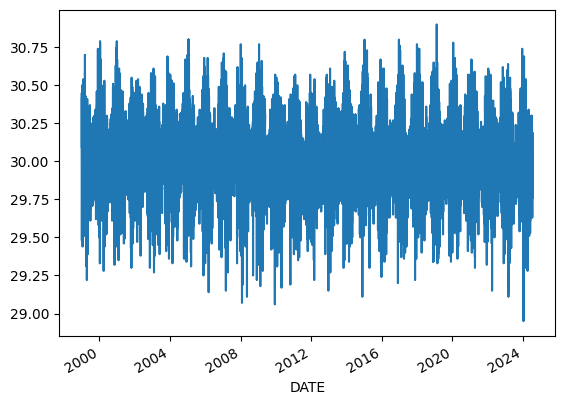

In [ ]:
altimeter = climate_data['HourlyAltimeterSetting']
altimeter.plot()

<Axes: xlabel='DATE'>

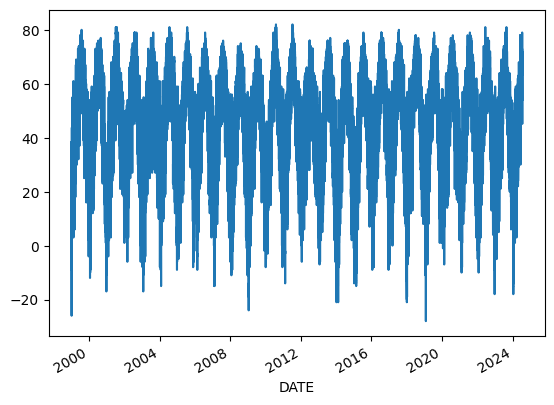

In [ ]:
hourlydew = climate_data['HourlyDewPointTemperature']
hourlydew.plot()

<Axes: xlabel='DATE'>

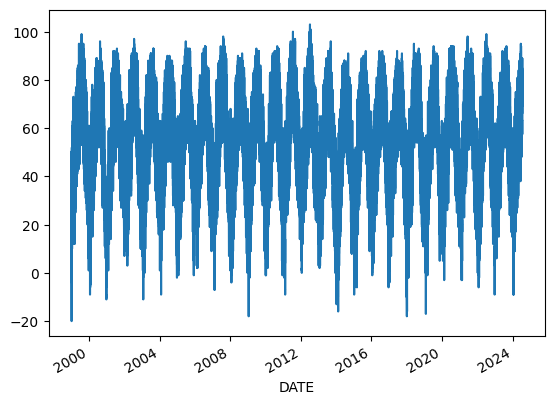

In [ ]:
hourlydry = climate_data['HourlyDryBulbTemperature']
hourlydry.plot()

<Axes: xlabel='DATE'>

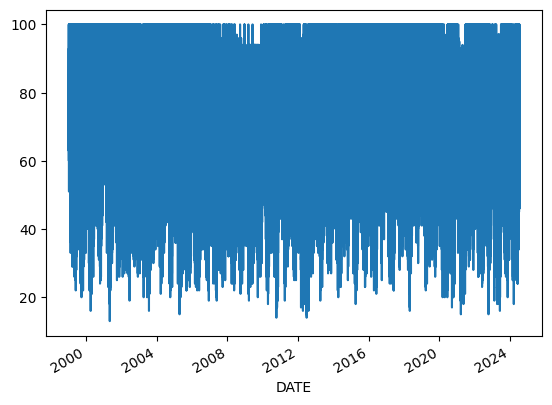

In [ ]:
hourlyRH = climate_data['HourlyRelativeHumidity']
hourlyRH.plot()

<Axes: xlabel='DATE'>

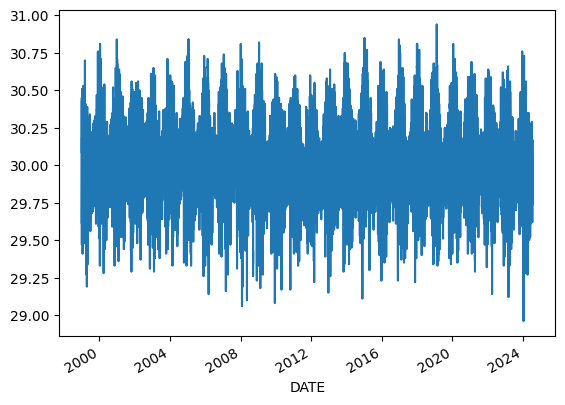

In [ ]:
hourlypressure = climate_data['HourlySeaLevelPressure']
hourlypressure.plot()

something is odd here. need to look further into it

<Axes: xlabel='DATE'>

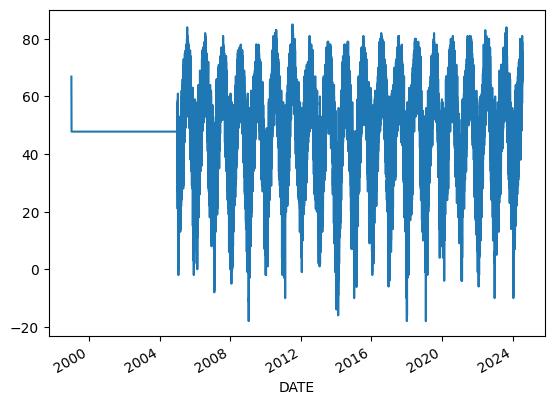

In [ ]:
hourlywet = climate_data['HourlyWetBulbTemperature']
hourlywet.plot()

<Axes: xlabel='DATE'>

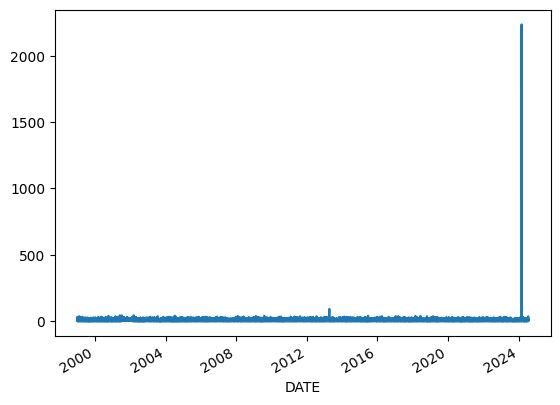

In [ ]:
hourlywindspeed = climate_data['HourlyWindSpeed']
hourlywindspeed.plot()

# Pipeline (Ensemble Model)

Here, I'm using an ensemble (hybrid model) of Random Forest and LSTM to capture short-term weather patterns and long-term (10 years to 30 years) climate trends.The RF model handles non-linear relationships and is robust to overfitting for large datasets. I'm using an LSTM for temporal dependencies.

https://youtu.be/LDRbO9a6XPU?si=tBt9vtEuVp92Lj4S

https://youtu.be/d12ra3b_M-0?si=H564MFe7Oxv0IMre

pytorch tutorial: https://youtu.be/V_xro1bcAuA?si=7ts-lWXfXzIaw6il

In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Assuming climate_data is your DataFrame
X = climate_data.drop(columns=['HourlyWetBulbTemperature'])
y = climate_data['HourlyWetBulbTemperature']

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define preprocessing steps for Random Forest
preprocessor_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Step 5: Define the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 6: Create a pipeline for Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('model', model_rf)
])

# Step 7: Train the Random Forest model
pipeline_rf.fit(X_train, y_train)

# Step 8: Prepare data for LSTM
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create sequences for LSTM
time_steps = 10
train_generator = TimeseriesGenerator(X_train_scaled, y_train, length=time_steps, batch_size=32)
test_generator = TimeseriesGenerator(X_test_scaled, y_test, length=time_steps, batch_size=32)

# Step 9: Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train.shape[1])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Step 10: Train the LSTM model
model_lstm.fit(train_generator, epochs=50, validation_data=test_generator)

# Step 11: Make predictions with both models
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_lstm = model_lstm.predict(test_generator)
y_pred_lstm = y_pred_lstm.flatten()

# Step 12: Combine predictions (simple average)
combined_predictions = (y_pred_rf[time_steps:] + y_pred_lstm) / 2

# Step 13: Evaluate the combined model
mse_combined = mean_squared_error(y_test[time_steps:], combined_predictions)
print('Mean Squared Error (Combined):', mse_combined)

# Optional: Deploy the model for new predictions
# Save models or create a function to combine predictions from both models for new data

# Step 14: Save the trained models
joblib.dump(pipeline_rf, 'random_forest_climate_model.pkl')
model_lstm.save('lstm_climate_model.h5')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/sequence.py:189: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])


8856/8856 [==============================] - 73s 8ms/step - loss: 239.2994 - val_loss: 214.0110
Epoch 2/50
8856/8856 [==============================] - 71s 8ms/step - loss: 216.1315 - val_loss: 218.4286
Epoch 3/50
8856/8856 [==============================] - 76s 9ms/step - loss: 215.4226 - val_loss: 213.5790
Epoch 4/50
8856/8856 [==============================] - 71s 8ms/step - loss: 215.0719 - val_loss: 213.5890
Epoch 5/50
8856/8856 [==============================] - 70s 8ms/step - loss: 215.1306 - val_loss: 214.0405
Epoch 6/50
8856/8856 [==============================] - 73s 8ms/step - loss: 214.5756 - val_loss: 214.1391
Epoch 7/50
8856/8856 [==============================] - 68s 8ms/step - loss: 214.7387 - val_loss: 214.0431
Epoch 8/50
8856/8856 [==============================] - 68s 8ms/step - loss: 214.4229 - val_loss: 213.5994
Epoch 9/50
8856/8856 [==============================] - 68s 8ms/step - loss: 214.3344 - val_loss: 213.6387
Epoch 10/50
8856/8856 [=========================

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/sequence.py:189: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])


2214/2214 [==============================] - 8s 4ms/step
Mean Squared Error (Combined): 54.454422202087365


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Making predictions**

In [ ]:
import joblib
from keras.models import load_model

# Step 15: Function to load models and make combined predictions
def load_models():
    # Load the saved models
    pipeline_rf = joblib.load('random_forest_climate_model.pkl')
    model_lstm = load_model('lstm_climate_model.h5')
    return pipeline_rf, model_lstm

def make_predictions(X_new, time_steps=10):
    # Load models
    pipeline_rf, model_lstm = load_models()

    # Preprocess new data
    X_new_scaled = pipeline_rf.named_steps['preprocessor'].transform(X_new)

    # Make predictions with Random Forest
    y_pred_rf = pipeline_rf.predict(X_new)

    # Prepare data for LSTM predictions
    new_generator = TimeseriesGenerator(X_new_scaled, np.zeros(len(X_new_scaled)), length=time_steps, batch_size=1)
    y_pred_lstm = model_lstm.predict(new_generator)
    y_pred_lstm = y_pred_lstm.flatten()

    # Combine predictions (simple average)
    combined_predictions = (y_pred_rf[time_steps:] + y_pred_lstm) / 2

    return combined_predictions

# Example usage for new data
# X_new = ...  # Replace with new data
# combined_predictions = make_predictions(X_new)
# print(combined_predictions)